# 멀티라벨 분류
일단 유제품과 면류 2가지 이미지를 분류한다

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [3]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./dataset/train_data"
categories = ["dairy", "noodle"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)
X = np.array(X)
y = np.array(y)
#1 0 이면 dairy
#0 1 이면 noodle 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./multi_image_data.npy", xy)

print("ok", len(y))

dairy  파일 길이 :  2027
dairy  :  ./dataset/train_data/dairy\10246_00_m_14.jpg
dairy  :  ./dataset/train_data/dairy\20243_30_s_9.jpg
dairy  :  ./dataset/train_data/dairy\45132_00_s_22.jpg
noodle  파일 길이 :  1335
noodle  :  ./dataset/train_data/noodle\10101_00_m_10.jpg
noodle  :  ./dataset/train_data/noodle\60110_60_m_21.jpg
ok 3362


C:\Users\soobi\miniconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [15]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('./multi_image_data.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(2521, 64, 64, 3)
2521


In [16]:
categories = ["dairy", "noodle"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [18]:

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [20]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.5871
Epoch 1: val_loss improved from inf to 0.61033, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
79/79 [==============================] - 6s 76ms/step - loss: 0.7790 - accuracy: 0.5871 - val_loss: 0.6103 - val_accuracy: 0.6718
Epoch 2/50
78/79 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.6911
Epoch 2: val_loss improved from 0.61033 to 0.56022, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
79/79 [==============================] - 6s 78ms/step - loss: 0.5847 - accuracy: 0.6906 - val_loss: 0.5602 - val_accuracy: 0.7004
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.5397 - accuracy: 0.7196
Epoch 3: val_loss improved from 0.56022 to 0.53548, saving model to ./model\multi_img_

In [21]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

27/27 [==============================] - 0s 16ms/step - loss: 0.3556 - accuracy: 0.8740
정확도 : 0.8740


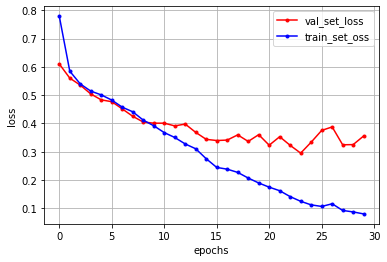

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [5]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./dataset/test_data"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "유제품"
    elif pre_ans == 1: pre_ans_str = "면류"
    #elif pre_ans == 2: pre_ans_str = "나비"
    #else: pre_ans_str = "게"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    #if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    #if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

[1.000 0.000]
0
해당 10249_00_s_22.jpg이미지는 유제품로 추정됩니다.
[1.000 0.000]
0
해당 15132_00_s_24.jpg이미지는 유제품로 추정됩니다.
[1.000 0.000]
0
해당 15195_00_s_14.jpg이미지는 유제품로 추정됩니다.
[1.000 0.000]
0
해당 20113_0_s_3.jpg이미지는 유제품로 추정됩니다.
[0.000 1.000]
1
해당 20114_30_s_1.jpg이미지는 면류으로 추정됩니다.
[0.000 1.000]
1
해당 25053_30_s_23.jpg이미지는 면류으로 추정됩니다.
[0.000 1.000]
1
해당 25292_00_s_22.jpg이미지는 면류으로 추정됩니다.
[1.000 0.000]
0
해당 25766_30_s_11.jpg이미지는 유제품로 추정됩니다.
[0.000 1.000]
1
해당 40061_0_s_15.jpg이미지는 면류으로 추정됩니다.
